<a href="https://colab.research.google.com/github/mehdifad55/Ynov-Fruit-Grp-8/blob/master/Ynov_Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip - "/content/gdrive/My Drive/archive.zip" 

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg

In [4]:
test_data='fruits-360/Test'
train_data='fruits-360/Training'

In [5]:
def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels


X_train, Y_train, labels = get_data(test_data)
X_test, Y_test,_ = get_data(train_data)

In [6]:
Y_train = np_utils.to_categorical(Y_train, 131)
Y_test = np_utils.to_categorical(Y_test, 131)

In [7]:

X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=33)
Y_train, Y_val = train_test_split(Y_train, test_size=0.2, random_state=33)

In [8]:
X_val.shape

(4538,)

In [9]:
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

X_train = np.array(convert_image_to_array(X_train))


In [10]:
X_val = np.array(convert_image_to_array(X_val))


In [11]:
X_test = np.array(convert_image_to_array(X_test))

In [12]:
X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

In [13]:
#Building model 1 using customized convolutional and pooling layers

model = Sequential()

#input_shape is 100*100 since thats the dimension of each of the fruit images
model.add(Conv2D(filters = 16, kernel_size = 2,input_shape=(100,100,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 32,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 64,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters = 128,kernel_size = 2,activation= 'relu',padding='same'))
model.add(MaxPooling2D(pool_size=2))

# specifying parameters for fully connected layer
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(150))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(Dense(131,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 16)      208       
_________________________________________________________________
activation (Activation)      (None, 100, 100, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0

In [14]:
from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [16]:
# creating a file to save the trained CNN model 
checkpointer = ModelCheckpoint(filepath = 'cnn_from_scratch_fruits.hdf5', verbose = 1, save_best_only = True)

# fitting model using above defined layers 
CNN_model = model.fit(X_train,Y_train,
        batch_size = 128,
        epochs=20,
        validation_data=(X_val, Y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/20
142/142 - 70s - loss: 0.4987 - accuracy: 0.8419 - val_loss: 0.0670 - val_accuracy: 0.9841

Epoch 00001: val_loss improved from inf to 0.06705, saving model to cnn_from_scratch_fruits.hdf5
Epoch 2/20
142/142 - 67s - loss: 0.3213 - accuracy: 0.8974 - val_loss: 0.0283 - val_accuracy: 0.9945

Epoch 00002: val_loss improved from 0.06705 to 0.02826, saving model to cnn_from_scratch_fruits.hdf5
Epoch 3/20
142/142 - 67s - loss: 0.2383 - accuracy: 0.9213 - val_loss: 0.0204 - val_accuracy: 0.9956

Epoch 00003: val_loss improved from 0.02826 to 0.02041, saving model to cnn_from_scratch_fruits.hdf5
Epoch 4/20
142/142 - 67s - loss: 0.1879 - accuracy: 0.9392 - val_loss: 0.0124 - val_accuracy: 0.9974

Epoch 00004: val_loss improved from 0.02041 to 0.01236, saving model to cnn_from_scratch_fruits.hdf5
Epoch 5/20
142/142 - 67s - loss: 0.1593 - accuracy: 0.9466 - val_loss: 0.0115 - val_accuracy: 0.9976

Epoch 00005: val_loss improved from 0.01236 to 0.01151, saving model to cnn_from_scratch_f

In [17]:
#loading saved weights to use further
model.save('my_model'+".h5")
model.load_weights('cnn_from_scratch_fruits.hdf5')

In [18]:

#checking testset accuracy

score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

2116/2116 [==============================] - 91s 43ms/step - loss: 1.0825 - accuracy: 0.8583
Test accuracy: 0.8582698106765747


In [ ]:
# using model to predict on test data
Y_pred = model.predict(X_test)

# Lets plot the predictions of different fruits and check their original labels

fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

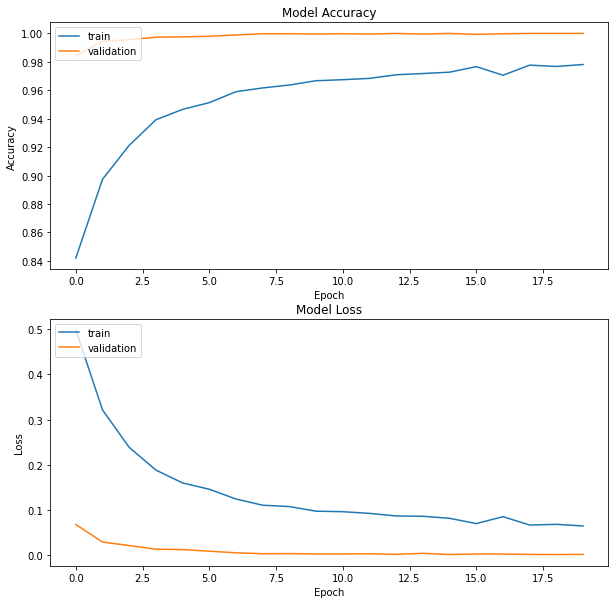

In [19]:

#plotting the loss function and accuracy for different epochs

plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(CNN_model.history['accuracy'])  
plt.plot(CNN_model.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(CNN_model.history['loss'])  
plt.plot(CNN_model.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

In [20]:
#importing vgg16

#Part 2 using transfer learning

#importing vgg16 architecture which is trained on Imagenet

from keras.applications.vgg16 import VGG16

vgg_model = VGG16(input_shape=[100,100,3], weights='imagenet', include_top=False)


58892288/58889256 [==============================] - 1s 0us/step


In [22]:

#We will not train the layers imported.

for layer in vgg_model.layers:
   layer.trainable = False

In [23]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [24]:
#adding some layers to the vgg_model imported and again fitting the model to check the performance

transfer_learning_model = Sequential()
 
transfer_learning_model.add(vgg_model)


transfer_learning_model.add(Conv2D(1024, kernel_size=3, padding='same'))

transfer_learning_model.add(Activation('relu'))

transfer_learning_model.add(MaxPooling2D(pool_size=(2, 2)))
transfer_learning_model.add(Dropout(0.3))

transfer_learning_model.add(Flatten())
transfer_learning_model.add(Dense(150))
transfer_learning_model.add(Activation('relu'))
transfer_learning_model.add(Dropout(0.4))
transfer_learning_model.add(Dense(131,activation = 'softmax'))
transfer_learning_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 3, 3, 512)         14714688  
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 1024)        4719616   
_________________________________________________________________
activation_2 (Activation)    (None, 3, 3, 1024)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 1024)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 1024)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)              

In [25]:

from keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
transfer_learning_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:

#fitting the new model


checkpointer = ModelCheckpoint(filepath = 'transfer_learning.hdf5', verbose = 1, save_best_only = True)

# running 
transfer_learning_cnn = transfer_learning_model.fit(X_train,Y_train,
        batch_size = 128,
        epochs=20,
        validation_data=(X_val, Y_val),
        callbacks = [checkpointer],
        verbose=2, shuffle=True)

Epoch 1/20
142/142 - 776s - loss: 3.2150 - accuracy: 0.2873 - val_loss: 0.8651 - val_accuracy: 0.8797

Epoch 00001: val_loss improved from inf to 0.86513, saving model to transfer_learning.hdf5
Epoch 2/20
142/142 - 773s - loss: 0.8407 - accuracy: 0.7757 - val_loss: 0.1355 - val_accuracy: 0.9815

Epoch 00002: val_loss improved from 0.86513 to 0.13554, saving model to transfer_learning.hdf5
Epoch 3/20
142/142 - 774s - loss: 0.3205 - accuracy: 0.9129 - val_loss: 0.0414 - val_accuracy: 0.9949

Epoch 00003: val_loss improved from 0.13554 to 0.04140, saving model to transfer_learning.hdf5
Epoch 4/20
142/142 - 773s - loss: 0.1756 - accuracy: 0.9525 - val_loss: 0.0163 - val_accuracy: 0.9982

Epoch 00004: val_loss improved from 0.04140 to 0.01628, saving model to transfer_learning.hdf5
Epoch 5/20
142/142 - 766s - loss: 0.1123 - accuracy: 0.9704 - val_loss: 0.0114 - val_accuracy: 0.9982

Epoch 00005: val_loss improved from 0.01628 to 0.01140, saving model to transfer_learning.hdf5
Epoch 6/20
142